In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [261]:
data=pd.read_csv('./Data/second_target.csv')

### 요식업 관련해서만 할려고 한다.

In [262]:
target=data.iloc[:,:13]
feature=data[['시간대_06~11_매출_비율','연령대_20_매출_비율','점포수']]
feature.head()

target=pd.concat([target,feature],axis=1)

food=target[target['서비스_업종_코드_명'].isin(
       ['한식음식점', '중식음식점', '일식음식점', '양식음식점',
          '패스트푸드점', '분식전문점',
          '치킨전문점','제과점','호프-간이주점','커피-음료'])]

In [263]:
food=food.sort_values(by=['분기당_매출_금액'])

In [264]:
food.reset_index(drop=True,inplace=True)

### 데이터 알아보기
- 데이터 금액은 원단위이고 <br><br>
- 3사 카드사의 데이터를 가지고 매출액을 추정한다. <br><br>
- 카드 비중이 높은 서비스 유형을 찾아야 한다. <br><br>
- 18년도 이전과 19년도 이전에 카드사 산출 방식이 달라졌다. <br><br>
- 18년도 카드 3사 , 19년도 이후에 카드사 하나만 산출 하는 방식으로 바뀌었다고 한다. <br><br>
- 카드를 많이 사용하지 않는 매장이 많은 상권과 18년도와 19년도의 산출방식의 바뀜에 따라서 상점의 수가 급격히 떨어지는 상권을 찾아야 한다. <br><br>
- 두 가지 방법을 통해 이를 확인해보려고 한다. <br><br>
    - 1) 점포수의 평균값에 비해 줄어든 점포수의 평균값의 절대값이 많이 높을 때 <br><br>
    - 2) 분기당 매출 금액이 현저히 낮을 때 <br><br>

In [265]:
food.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '행정동_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명',
       '분기당_매출_금액', '시간대_06~11_매출_비율', '연령대_20_매출_비율', '점포수'],
      dtype='object')

In [266]:
food.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,시간대_06~11_매출_비율,연령대_20_매출_비율,점포수
0,2016,3,A,골목상권,11380,은평구,11380640,증산동,1000426,증산로5길,CS100009,호프-간이주점,119,0,0,1
1,2018,1,A,골목상권,11380,은평구,11380640,증산동,1000426,증산로5길,CS100009,호프-간이주점,119,0,0,1
2,2015,4,A,골목상권,11380,은평구,11380640,증산동,1000426,증산로5길,CS100009,호프-간이주점,122,0,100,1
3,2014,3,A,골목상권,11380,은평구,11380640,증산동,1000426,증산로5길,CS100009,호프-간이주점,126,0,0,1
4,2014,2,A,골목상권,11650,서초구,11650510,서초1동,1000850,남부순환로339길,CS100005,제과점,917,100,0,1


In [267]:
food_count=food.pivot_table(index=['상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명'],aggfunc='size')

In [268]:
food_count=pd.DataFrame(food_count[food_count == 32]).reset_index()
len(food_count)

7218

In [269]:
code=zip(food_count['상권_코드'],food_count['서비스_업종_코드'])

In [270]:
food_temp = food[food[['상권_코드','서비스_업종_코드']].apply(tuple,1).isin(code)]
food_temp_count=food_temp.pivot_table(index=['상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명'],aggfunc='size')

In [271]:
len(food_temp) / 32 

7218.0

In [272]:
len(food_temp) / 32 == len(food_count)

True

In [273]:
food_temp = food_temp.sort_values(by=['기준_년_코드','기준_분기_코드'])
food_temp = food_temp.sort_values(by=[ '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '행정동_코드_명', '상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명']) 

food_temp.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,시간대_06~11_매출_비율,연령대_20_매출_비율,점포수
183780,2014,1,A,골목상권,11110,종로구,11110515,청운효자동,1000012,옥인길,CS100001,한식음식점,212793306,0,24,3
205616,2014,2,A,골목상권,11110,종로구,11110515,청운효자동,1000012,옥인길,CS100001,한식음식점,293139975,0,20,3
220358,2014,3,A,골목상권,11110,종로구,11110515,청운효자동,1000012,옥인길,CS100001,한식음식점,371430078,0,27,5
220392,2014,4,A,골목상권,11110,종로구,11110515,청운효자동,1000012,옥인길,CS100001,한식음식점,371636640,0,22,5
201584,2015,1,A,골목상권,11110,종로구,11110515,청운효자동,1000012,옥인길,CS100001,한식음식점,275326330,1,25,6


In [274]:
food=food_temp

In [275]:
food['전분기 점포수']=food['점포수'].shift(1)
food.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,시간대_06~11_매출_비율,연령대_20_매출_비율,점포수,전분기 점포수
183780,2014,1,A,골목상권,11110,종로구,11110515,청운효자동,1000012,옥인길,CS100001,한식음식점,212793306,0,24,3,NaN
205616,2014,2,A,골목상권,11110,종로구,11110515,청운효자동,1000012,옥인길,CS100001,한식음식점,293139975,0,20,3,3.0
220358,2014,3,A,골목상권,11110,종로구,11110515,청운효자동,1000012,옥인길,CS100001,한식음식점,371430078,0,27,5,3.0
220392,2014,4,A,골목상권,11110,종로구,11110515,청운효자동,1000012,옥인길,CS100001,한식음식점,371636640,0,22,5,5.0
201584,2015,1,A,골목상권,11110,종로구,11110515,청운효자동,1000012,옥인길,CS100001,한식음식점,275326330,1,25,6,5.0


In [276]:
food=food.fillna(0)

In [277]:
food['줄어든 점포수'] = food['점포수']-food['전분기 점포수']
food.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,시간대_06~11_매출_비율,연령대_20_매출_비율,점포수,전분기 점포수,줄어든 점포수
183780,2014,1,A,골목상권,11110,종로구,11110515,청운효자동,1000012,옥인길,CS100001,한식음식점,212793306,0,24,3,0.0,3.0
205616,2014,2,A,골목상권,11110,종로구,11110515,청운효자동,1000012,옥인길,CS100001,한식음식점,293139975,0,20,3,3.0,0.0
220358,2014,3,A,골목상권,11110,종로구,11110515,청운효자동,1000012,옥인길,CS100001,한식음식점,371430078,0,27,5,3.0,2.0
220392,2014,4,A,골목상권,11110,종로구,11110515,청운효자동,1000012,옥인길,CS100001,한식음식점,371636640,0,22,5,5.0,0.0
201584,2015,1,A,골목상권,11110,종로구,11110515,청운효자동,1000012,옥인길,CS100001,한식음식점,275326330,1,25,6,5.0,1.0


In [278]:
food_temp =food[~((food['기준_년_코드'] == 2014) & (food['기준_분기_코드'] == 1))]

In [279]:
food_reduced = food_temp.pivot_table(index=['상권_코드_명','서비스_업종_코드_명'],values=['점포수','줄어든 점포수'],aggfunc=(np.mean,np.std))

In [280]:
food_reduced[food_reduced[('점포수','mean')] < np.abs(food_reduced[('줄어든 점포수','mean')])]

Empty DataFrame
Columns: [(점포수, mean), (점포수, std), (줄어든 점포수, mean), (줄어든 점포수, std)]
Index: []

#### 없다 -> 그 말인 즉슨 카드사를 1개 데이터로 추정 하였다고 갑자기 확 떨어진 상권의 서비스 업종이 없다는 말이다. 
#### 왜 그런지 생각해보면, 요식업의 경우 다양한 사람이 접근 가능하기 때문에 이렇다고 생각한다.

In [281]:
# 안 쓰는 컬럼 제거
del food['전분기 점포수']
del food['줄어든 점포수']

### 현저히 낮은 금액의 상권 찾기

- 순이익이 아니라 총 매출액이기 때문에 10,000,000은 벌어야 꾸준히 할만하지 않나? <br><br>
- 그것이 아니라면, 현금이 많은 가게이거나, 장사에 관심이 없는 매장이 많은 곳이 아닐까? <br><br>

In [282]:
food.sort_values(by='분기당_매출_금액')

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,시간대_06~11_매출_비율,연령대_20_매출_비율,점포수
6,2021,1,R,전통시장,11380,은평구,11380650,수색동,1001376,수일시장,CS100009,호프-간이주점,1786,0,0,9
11,2020,3,R,전통시장,11200,성동구,11200615,금호2.3가동,1001296,금남시장,CS100009,호프-간이주점,10327,0,0,1
43,2015,3,A,골목상권,11620,관악구,11620595,청룡동,1000833,청룡8길,CS100010,커피-음료,40094,0,0,0
63,2021,3,A,골목상권,11545,금천구,11545510,가산동,1000659,남부순환로112길,CS100010,커피-음료,54671,38,100,3
66,2021,4,A,골목상권,11545,금천구,11545510,가산동,1000659,남부순환로112길,CS100010,커피-음료,56280,0,17,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307152,2017,4,U,관광특구,11140,중구,11140520,소공동,1001492,명동 남대문 북창동 다동 무교동 관광특구,CS100001,한식음식점,67173960764,2,25,683
307153,2015,4,U,관광특구,11140,중구,11140520,소공동,1001492,명동 남대문 북창동 다동 무교동 관광특구,CS100001,한식음식점,67667709483,3,25,692
307154,2016,4,U,관광특구,11140,중구,11140520,소공동,1001492,명동 남대문 북창동 다동 무교동 관광특구,CS100001,한식음식점,71470709551,2,24,696
307155,2018,4,U,관광특구,11140,중구,11140520,소공동,1001492,명동 남대문 북창동 다동 무교동 관광특구,CS100001,한식음식점,71952878741,2,24,660


### 분기당_매출_금액의 분포가 어디까지 특징이 있는지 파악하기

In [283]:
# 인덱스 초기화 하기
food.reset_index(drop=True,inplace=True)

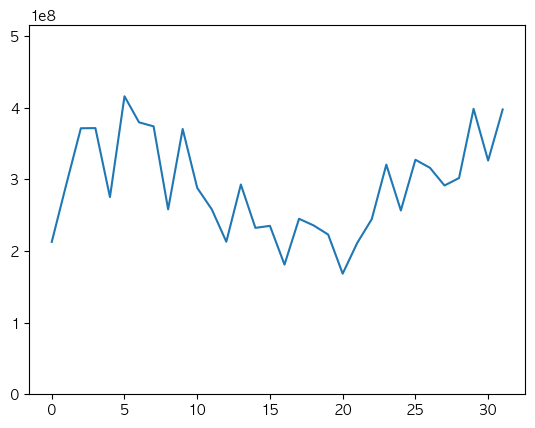

In [284]:
# 대표로 하나 해보기
temp=food[food['상권_코드'] == 1000012]
temp=temp[temp['서비스_업종_코드'] == 'CS100001']

plt.plot(
    temp['분기당_매출_금액']
)

plt.ylim(0,temp['분기당_매출_금액'].max() + 10**8)

plt.show()

### 10배로 했을 때

In [285]:
food=food[food['상권_구분_코드_명'] == '골목상권']

{'whiskers': [<matplotlib.lines.Line2D at 0x29ee21b50>,
 'caps': [<matplotlib.lines.Line2D at 0x29ee250d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29ee218b0>],
 'medians': [<matplotlib.lines.Line2D at 0x29ee25610>],
 'fliers': [<matplotlib.lines.Line2D at 0x29ee258b0>],
 'means': []}

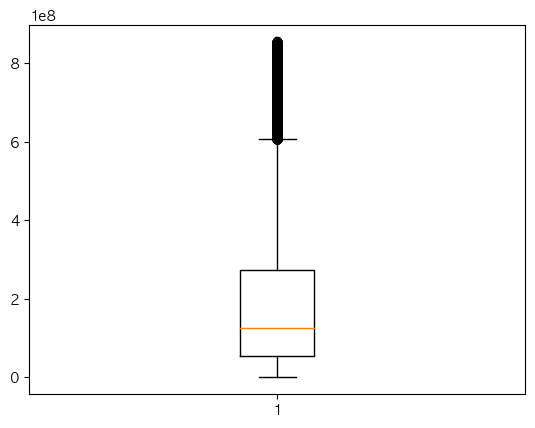

In [286]:
from module.outlier import remove
test=remove(food,'분기당_매출_금액')
plt.boxplot(
    test['분기당_매출_금액']
)

In [287]:
# right = []
# wrong = []

# for sangkwon in food['상권_코드_명'].unique():
#     temp2 = food[food['상권_코드_명'] == sangkwon]
#     for service in temp2['서비스_업종_코드_명'].unique():
#         temp=food[food['상권_코드_명'] == sangkwon]
#         temp=temp[temp['서비스_업종_코드_명'] == service]

#         temp.reset_index(drop=True,inplace=True)

#         max = temp['분기당_매출_금액'].max()
#         min = temp['분기당_매출_금액'].min()

#         if max < 10 * min:
#             right.append((sangkwon,service))
#         else:
#             wrong.append((sangkwon,service))


In [288]:
# len(right) / (len(wrong) + len(right)) * 100

In [289]:
# test=food[food[['상권_코드_명','서비스_업종_코드_명']].apply(tuple,1).isin(right)]

# plt.boxplot(
#     test['분기당_매출_금액']
# )

In [290]:
len(test)/(len(food)) * 100

89.65073529411765

{'whiskers': [<matplotlib.lines.Line2D at 0x14797fd60>,
 'caps': [<matplotlib.lines.Line2D at 0x1478f3b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x14797ffa0>],
 'medians': [<matplotlib.lines.Line2D at 0x1478f3310>],
 'fliers': [<matplotlib.lines.Line2D at 0x137bb5610>],
 'means': []}

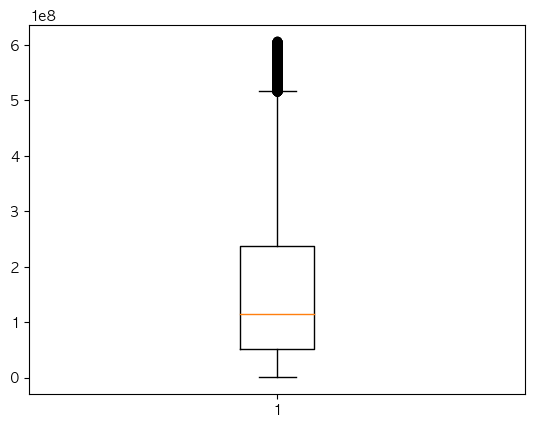

In [291]:
test=remove(test,'분기당_매출_금액')
plt.boxplot(
    test['분기당_매출_금액']
)

### 5배로

In [292]:

# right = []
# wrong = []

# for sangkwon in food['상권_코드_명'].unique():
#     temp2 = food[food['상권_코드_명'] == sangkwon]
#     for service in temp2['서비스_업종_코드_명'].unique():
#         temp=food[food['상권_코드_명'] == sangkwon]
#         temp=temp[temp['서비스_업종_코드_명'] == service]

#         temp.reset_index(drop=True,inplace=True)

#         max = temp['분기당_매출_금액'].max()
#         min = temp['분기당_매출_금액'].min()

#         if max < 5 * min:
#             right.append((sangkwon,service))
#         else:
#             wrong.append((sangkwon,service))

In [293]:
# len(right) / (len(wrong) + len(right)) * 100

In [294]:
# test=food[food[['상권_코드_명','서비스_업종_코드_명']].apply(tuple,1).isin(right)]

# plt.boxplot(
#     test['분기당_매출_금액']
# )

In [295]:
len(test)/(len(food)) * 100

84.35593681917211

{'whiskers': [<matplotlib.lines.Line2D at 0x29ed8b730>,
 'caps': [<matplotlib.lines.Line2D at 0x29ed8bb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x29ed8b490>],
 'medians': [<matplotlib.lines.Line2D at 0x29ed7f0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29ed7f370>],
 'means': []}

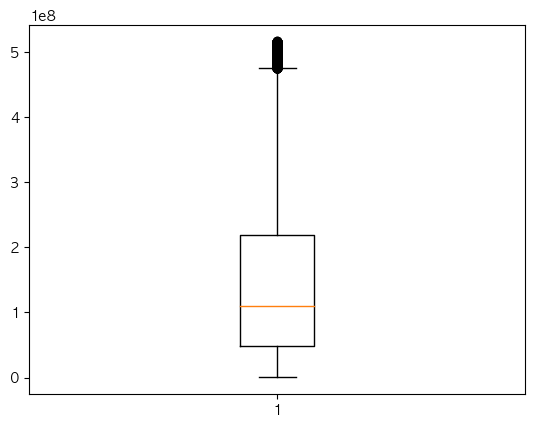

In [296]:
test=remove(test,'분기당_매출_금액')
plt.boxplot(
    test['분기당_매출_금액']
)

### 제거하지 말고 그거의 median 값 주기

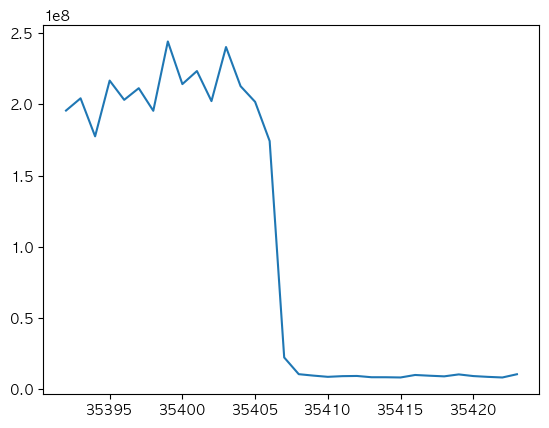

In [297]:
temp=food[food['상권_코드_명'] == '동일로157길']
temp=temp[temp['서비스_업종_코드_명'] == '제과점']

plt.plot(
    temp['분기당_매출_금액']
)

plt.show()

In [298]:
from scipy.stats import shapiro

In [300]:
test = food 
for sangkwon in food['상권_코드_명'].unique():
    temp2 = food[food['상권_코드_명'] == sangkwon]
    for service in temp2['서비스_업종_코드_명'].unique():
        temp=food[food['상권_코드_명'] == sangkwon]
        temp=temp[temp['서비스_업종_코드_명'] == service]

        temp.reset_index(drop=True,inplace=True)

        max = temp['분기당_매출_금액'].max()
        min = temp['분기당_매출_금액'].min()
        median = temp['분기당_매출_금액'].median()
        mean = temp['분기당_매출_금액'].mean()

        shapiro_test = shapiro(temp['분기당_매출_금액'])


        while True:
            if (max > min * 10) & (shapiro_test.pvalue <= 0.05):
                if max - mean > mean - min:
                    test.loc[
                            (
                                (food['상권_코드_명'] == sangkwon) & 
                                (food['서비스_업종_코드_명'] == service) &
                                (food['분기당_매출_금액'] == max)
                            ),
                            '분기당_매출_금액'
                        ] = median
                else:
                    test.loc[
                            (
                                (food['상권_코드_명'] == sangkwon) & 
                                (food['서비스_업종_코드_명'] == service) &
                                (food['분기당_매출_금액'] == min)
                            ),
                            '분기당_매출_금액'
                        ] = median
                
                temp=test[test['상권_코드_명'] == sangkwon]
                temp=temp[temp['서비스_업종_코드_명'] == service]

                temp.reset_index(drop=True,inplace=True)

                max = temp['분기당_매출_금액'].max()
                min = temp['분기당_매출_금액'].min()
                median = temp['분기당_매출_금액'].median()
                mean = temp['분기당_매출_금액'].mean()
                shapiro_test = shapiro(temp['분기당_매출_금액'])

                print(f'무한 : {sangkwon} , {service}')

                print(f'검정 값 : {shapiro_test.pvalue}')
            else:
                print(f'통과 : {sangkwon} , {service}')
                break

통과 : 옥인길 , 한식음식점
통과 : 옥인길 , 양식음식점
무한 : 옥인길 , 제과점
검정 값 : 1.0620630064295256e-06
무한 : 옥인길 , 제과점
검정 값 : 6.579336968570715e-07
무한 : 옥인길 , 제과점
검정 값 : 3.765143787859415e-07
무한 : 옥인길 , 제과점
검정 값 : 2.0033387215789844e-07
무한 : 옥인길 , 제과점
검정 값 : 1.0097890168481172e-07
무한 : 옥인길 , 제과점
검정 값 : 5.115010637268824e-08
무한 : 옥인길 , 제과점
검정 값 : 3.0006535922666444e-08
무한 : 옥인길 , 제과점
검정 값 : 3.6200198394453764e-08
무한 : 옥인길 , 제과점
검정 값 : 0.07926931977272034
통과 : 옥인길 , 제과점
통과 : 옥인길 , 커피-음료
통과 : 자하문로7길 , 한식음식점
통과 : 자하문로7길 , 중식음식점
통과 : 자하문로7길 , 일식음식점
통과 : 자하문로7길 , 양식음식점
통과 : 자하문로7길 , 제과점
무한 : 자하문로7길 , 치킨전문점
검정 값 : 0.0007777111022733152
무한 : 자하문로7길 , 치킨전문점
검정 값 : 0.000884801265783608
통과 : 자하문로7길 , 치킨전문점
통과 : 자하문로7길 , 분식전문점
무한 : 자하문로7길 , 호프-간이주점
검정 값 : 0.003799787489697337
무한 : 자하문로7길 , 호프-간이주점
검정 값 : 0.005370479542762041
무한 : 자하문로7길 , 호프-간이주점
검정 값 : 0.0083155557513237
무한 : 자하문로7길 , 호프-간이주점
검정 값 : 0.011680273339152336
무한 : 자하문로7길 , 호프-간이주점
검정 값 : 0.010893546976149082
무한 : 자하문로7길 , 호프-간이주점
검정 값 : 0.012393554672598839
무한

### 단위 더 작은 단위로 쪼개기

In [307]:
food.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,시간대_06~11_매출_비율,연령대_20_매출_비율,점포수
0,2014,1,A,골목상권,11110,종로구,11110515,청운효자동,1000012,옥인길,CS100001,한식음식점,212793306.0,0,24,3
1,2014,2,A,골목상권,11110,종로구,11110515,청운효자동,1000012,옥인길,CS100001,한식음식점,293139975.0,0,20,3
2,2014,3,A,골목상권,11110,종로구,11110515,청운효자동,1000012,옥인길,CS100001,한식음식점,371430078.0,0,27,5
3,2014,4,A,골목상권,11110,종로구,11110515,청운효자동,1000012,옥인길,CS100001,한식음식점,371636640.0,0,22,5
4,2015,1,A,골목상권,11110,종로구,11110515,청운효자동,1000012,옥인길,CS100001,한식음식점,275326330.0,1,25,6


In [308]:
food['상권_구분_코드'].unique()

array(['A'], dtype=object)

In [309]:
gwanak = food[food['시군구명'] == '관악구']
gwanak.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,시간대_06~11_매출_비율,연령대_20_매출_비율,점포수
109216,2014,1,A,골목상권,11620,관악구,11620525,보라매동,1000804,당곡길,CS100001,한식음식점,8.898105e+08,1,17,32
109217,2014,2,A,골목상권,11620,관악구,11620525,보라매동,1000804,당곡길,CS100001,한식음식점,1.034479e+09,1,19,33
109218,2014,3,A,골목상권,11620,관악구,11620525,보라매동,1000804,당곡길,CS100001,한식음식점,9.223991e+08,1,19,31
109219,2014,4,A,골목상권,11620,관악구,11620525,보라매동,1000804,당곡길,CS100001,한식음식점,9.913390e+08,1,22,31
109220,2015,1,A,골목상권,11620,관악구,11620525,보라매동,1000804,당곡길,CS100001,한식음식점,9.280116e+08,1,21,31


In [313]:
gwanak.shape[0] / 32

266.0

In [314]:
gwanak.sort_values(by='분기당_매출_금액')

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,시간대_06~11_매출_비율,연령대_20_매출_비율,점포수
111334,2015,3,A,골목상권,11620,관악구,11620595,청룡동,1000833,청룡8길,CS100010,커피-음료,4.009400e+04,0,0,0
111332,2015,1,A,골목상권,11620,관악구,11620595,청룡동,1000833,청룡8길,CS100010,커피-음료,1.697930e+05,0,0,0
111335,2015,4,A,골목상권,11620,관악구,11620595,청룡동,1000833,청룡8길,CS100010,커피-음료,2.004680e+05,0,0,0
111333,2015,2,A,골목상권,11620,관악구,11620595,청룡동,1000833,청룡8길,CS100010,커피-음료,3.302390e+05,0,0,0
117310,2021,3,A,골목상권,11620,관악구,11620775,난곡동,1000790,난곡로26길,CS100008,분식전문점,8.123420e+05,0,20,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116230,2015,3,A,골목상권,11620,관악구,11620735,대학동,1000839,호암로24길,CS100001,한식음식점,4.076681e+09,4,37,71
116241,2018,2,A,골목상권,11620,관악구,11620735,대학동,1000839,호암로24길,CS100001,한식음식점,4.129053e+09,4,37,60
116229,2015,2,A,골목상권,11620,관악구,11620735,대학동,1000839,호암로24길,CS100001,한식음식점,4.132880e+09,4,37,72
116237,2017,2,A,골목상권,11620,관악구,11620735,대학동,1000839,호암로24길,CS100001,한식음식점,4.163613e+09,4,40,63
